# CMSC478 Machine Learning - Fall 2020

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-2: Multi-Class Classification Using Random Forests and SVM</font>

Bryan Delas Penas GW90572

## Overview and Learning Objectives

In Assignment-2, you're going to build on the skills you developed in Assignment-1, and extend them on a relatively larger dataset of video games and their ratings as predicted value.

As discussed in the lectures, multi-class classification means your model classifies multiple (more than two) classes/labels. You are going to build classifiers that can predict video game ratings.

<b>Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping lines would be a major source of making mistakes and losing points in your assignments. Some outputs have been shared while some others have not been shared intentionally. You may NOT share the outputs, the code, and the answers in Piazza.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML models in practice. 
- practice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Preprocessing

The description of the dataset you're going to work on can be seen [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to use the features to predict video game rating - `Rating` column.

You can download the dataset directly from [here](https://github.com/fereydoonvafaei/CMSC478-Fall2020/blob/master/data/video-games.csv).

Follow the instructions for loading the data, preprocessing, training and testing carefully. You can enter your code in the areas with elipsis `...` notation.

## <font color="red"> Required Coding

In [2]:
# Import all the necessary modules from python and sklearn
# You may start with pandas, numpy and matplotlib,
# and keep adding the necessary modules here as you move forward
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
import numpy as np

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv("video-games.csv")

print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop NAs
game_data = game_data.dropna()

print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [5]:
# Drop "Name" column as it does not provide any useful info
game_data = game_data.drop('Name',1)

print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
# Drop "Global_Sales" column as it is a redundant feature - it's just sum of regional and other sales
game_data = game_data.drop('Global_Sales',1)

print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
# Get feature vector X (all columns but "Rating") and target label y as "Rating"
X= game_data.loc[:,game_data.columns != 'Rating']
y = game_data['Rating']

> You can resort the row indices but it's not necessary.

In [8]:
# Print X shape and head
print(X.shape)
X.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo


> Since some of the features are categorical, we need to convert them to numerical. One common technique is One-Hot Encoding which creates dummy variables. You can see some simple examples of one-hot encoding [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [9]:
# Using pandas.get_dummies() create dummy variables for categorical features (needs 1 line of code only)
X = pd.get_dummies(X)
print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,80.0,73.0,192.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,89.0,65.0,431.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,58.0,41.0,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Print y shape and head and its unique values
print(y.shape)
print(y.unique())
y.head()

(6825,)
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> You must convert your categorical labels/classes to numerical from 0 to 6. In Assignment-1, you used scikit-learn to do it. Here is another useful technique provided to you using `map` and `lambda` for conversion and the output type will be preserved as pandas series. NOTE: Your ourput should precisely match with the provided output.

In [11]:
# Convert categorical class labels to numerical
y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))

print(y.unique())
print(y.shape)
print(type(y))
y.head()

[0 3 2 1 4 5 6]
(6825,)
<class 'pandas.core.series.Series'>


0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

> <b>Note:</b> The output of the following cell is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by this output.

In [12]:
# Normalize X using mean() and std()  NOTE: The output is provided for your reference.
mean = np.mean(X)
std = np.std(X)
X-= mean
X /= std

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,-0.341201,42.349741,41.793631,12.887711,31.007176,0.413044,1.148059,0.250734,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
2,0.133752,15.802014,18.222438,12.957265,11.885525,0.845709,2.292536,0.909586,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
3,0.371229,15.729649,15.559767,11.183651,10.625572,0.701487,2.292536,0.029415,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
6,-0.341201,11.253338,12.955296,22.381762,10.366169,1.350484,1.876363,0.436302,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
7,-0.341201,14.023895,13.013496,9.966465,10.217939,-0.884950,0.627843,-0.077840,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105


In [13]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1677)
(5460,)
(1365, 1677)
(1365,)


## Part II - Multi-Class Classification Using Random Forests

Next, you're going to build classifiers. Some classifiers like [Random Forests in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can directly be applied on multi-class classification, so let's try RF first.

You may start with default hyperparameters, but you should definitely fine-tune them as described in the following cell to achieve at least 0.65 for mean cv score. Your cv score should use `accuracy` as its metric. Also notice that - as discussed in the lectures - you must apply `cross_val_score` on the whole dataset (not just on training or testing set). You may see the full documentation of `cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

> Note: Depending on the speed of your computer and the hyperparameter values you choose, running this cell may take a few minutes.

In [18]:
# Create a RandomForestClassifier - You may start with default hyperparameters,
# but you should fine-tune them to achieve at least 0.65 for mean cv score
rf_clf = RandomForestClassifier(n_estimators = 110, random_state = 1)

In [19]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
rf_cv_score = cross_val_score(rf_clf,X,y,scoring = 'accuracy', cv = 10)

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.6708950978630386


> Next, you're going to fine-tune your rf classifier based on `n_estimators` hyperparameter. Depending on your computer speed, this may take a long time. Read the comments in the following cell, and plot the impact of n_estimators on mean cv scores. To make it a bit faster, you're going to change cv to 5-fold. cv `scoring` will still be `accuracy`.

Text(0.5, 0, 'n_est_list')

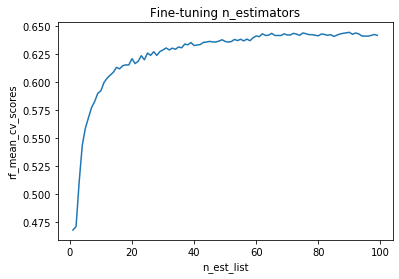

In [20]:
# Now fine-tune n_estimators hyperparameter as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have title "Fine-tuning n_estimators", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take well more than an hour or even several hours!

rf_mean_cv_scores = []
n_est_list = []
for n_estimator in range(1, 100):
    rf_clf = RandomForestClassifier(n_estimators = n_estimator, random_state = 1)
    rf_cv_score = cross_val_score(rf_clf, X, y, cv = 5, scoring = 'accuracy')
    rf_mean_cv_scores.append(rf_cv_score.mean())
    n_est_list.append(n_estimator)
    
plt.title('Fine-tuning n_estimators')
plt.plot(n_est_list ,rf_mean_cv_scores)
plt.ylabel('rf_mean_cv_scores')
plt.xlabel('n_est_list')

In [21]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
# Get feature_importances of rf for all features
for name, score in zip(game_data, rf_clf.feature_importances_):
    print(name, score)

Platform 0.042852038834487176
Year_of_Release 0.04100715545929006
Genre 0.0382575483275438
Publisher 0.01998860426173322
NA_Sales 0.030644760752644804
EU_Sales 0.04395611335304072
JP_Sales 0.05141531501804756
Other_Sales 0.06305133591451229
Critic_Score 0.0028686821321869446
Critic_Count 0.00012383265739809615
User_Score 0.009197118362481552
User_Count 0.006412462911592856
Developer 0.0035797692676331817
Rating 0.005365931014815892


In [23]:
# Make predictions on test set
y_pred = rf_clf.predict(X_test)

In [24]:
# Get classification report # Note: You must import the related module from sklearn to run this cell!
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       437
           1       0.67      0.44      0.53       176
           2       0.66      0.74      0.70       481
           3       0.73      0.67      0.70       269
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.71      1365
   macro avg       0.47      0.45      0.45      1365
weighted avg       0.71      0.71      0.71      1365



### Part II Questions

Answer the following question HERE:

Q1 [3 points] - According to `feature_importance` of rf classifier, (which works based on the average impurity reduction of the feature across all trees of the forest) what are the most important features in predicting Rating? Name top five.
<br> Platform, User count, genre, Rating and Userscore<br>.
Q2 [2 points]- According to your plot, what is the best range for n_estimators?
<br>20 - 100 <br>
Q3 [3 points] - According to the classification report of rf classifier, which classes are relatively easier to classify? Compare different metrics of each class label that you see in the classification report.
<br> Class 0 - 3, As class 4 and class 6 had a precision of 0, recall of 0 and f1-score of zero. <br>

## Part III - Multi-Class Classification Using SVM and Kernels

In Part III, you're going to use SVM and kernels for multi-class classification.

To use [SVM implementation from scikit-learn](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification), you need to use OvO or OvR strategies.

Remember from the lectures that SVM can be linear or non-linear using kernels. [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) is the implementation of SVM for the case of a linear kernel.

Note that [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) does not accept keyword kernel, as this is assumed to be linear. It implements OvR multi-class strategy and uses it by default, thus training n_class models and the runtime is usually less than OvO strategy although for this dataset, it may still take a few minutes to run.

## <font color="red"> Required Coding

In [13]:
# Build a linear SVM - You may start with default hyperparameters,
# but you should fine-tune them to get at least 0.65 for mean cv score
lin_svm_clf = LinearSVC(dual = 0, random_state = 0, tol=1e-4)

In [26]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
lin_svm_cv_score = cross_val_score(lin_svm_clf,X, y, cv = 10, scoring ='accuracy')
print("Mean cv Score - Linear SVM: ", lin_svm_cv_score.mean())

Mean cv Score - Linear SVM:  0.6760277612395607


Text(0.5, 0, 'C_values')

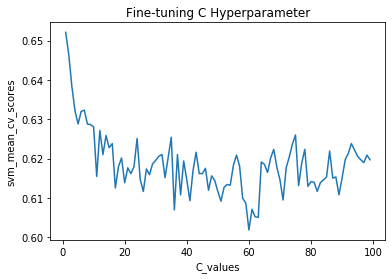

In [14]:
# Now fine-tune C hyperparameter as follows:

# 1- Write a for loop that iterates over C from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate lin_svm_cv_score.mean()
# and append it to the list svm_mean_cv_scores
# 3- Finally, plot svm_mean_cv_scores on y-axis versus C_values on x-axis
# Your plot should have title "Fine-tuning C Hyperparameter", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take several hours!

svm_mean_cv_scores = []
C_values = range(1, 100)

for c_estimators in range(1, 100):
    lin_svm_clf = LinearSVC(C=c_estimators, random_state = 0, tol=1e-4)
    lin_svm_cv_score = cross_val_score(lin_svm_clf,X, y, cv = 5, scoring ='accuracy')
    svm_mean_cv_scores.append(lin_svm_cv_score.mean())

    
plt.title('Fine-tuning C Hyperparameter')
plt.plot(C_values ,svm_mean_cv_scores)
plt.ylabel('svm_mean_cv_scores')
plt.xlabel('C_values')

> Now, let's try [kernel svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on this problem. Fine-tune C hyperparameter with at least 3 values {1, 10, 100}.

In [18]:
# Build a kernel svm with rbf kernel
# Note: You should specify ovo strategy, see the example in documentation section 1.4.1.1 in the link below
# https://scikit-learn.org/stable/modules/svm.html#multi-class-classification
rbf_svm_clf = svm.SVC(C = 10, kernel='rbf', decision_function_shape='ovo')

In [19]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
rbf_svm_cv_score = cross_val_score(rbf_svm_clf,X, y, cv = 10, scoring ='accuracy')

print("Mean cv Score - Kernel SVM - RBF: ", rbf_svm_cv_score.mean())

Mean cv Score - Kernel SVM - RBF:  0.6911841602626284


In [16]:
# Build a kernel svm with polynomial kernel
poly_svm_clf = svm.SVC(C= 100, kernel='poly', decision_function_shape='ovo')

In [17]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
poly_svm_cv_score = cross_val_score(poly_svm_clf,X, y, cv = 10, scoring ='accuracy')

print("Mean cv Score - Kernel SVM - Poly: ", poly_svm_cv_score.mean())

Mean cv Score - Kernel SVM - Poly:  0.6195713612786721


### Part III Questions

Anwser the following question HERE:

Q1 [2 points] - According to the plot, what is the best range of values for C hyperparameter of linear SVM?
<br> 20 - 80 <br>
Q2 [2 points] - Acording to your experiments, which non-linear kernel worked better on this dataset? Was it better to use linear svm or kernel svm on this dataset?
<br> The non linear kernel would be rbf worked better on this data as the cross value score is higher .65. It was better to use kernel svm as the score is closer to .65 compared to linear. <br>

## Grading

Assignment-2 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I preprocessing: 10 points (if you don't get the correct X and y, all the following parts would be wrong, your whole assignment will get no credit!)

- Part II Random Forests - 40 points
    - Implementation and training: 12 points
    - Fine-tuning plot: 20 points
    - Questions: 8 points

- Part III SVM and Kernels - 50 points
    - Implementation and training: 26 points
    - Fine-tuning C plot: 20 points
    - Questions: 4 points

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A2.ipynb```. Submit the completed notebook using the ```Assignment-2``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Friday October 16th, 11:59PM.</b></font>